## How to Spot a Counterfeit Banknote

In the US there is about one counterfeit banknote for every 10,000 genuine banknotes. Although they are nearly impossible to identify with the naked eye, image processing is one method that can be used to spot discrepencies in counterfeit notes.

Given a dataset of over a thousand notes with 4 attributes each, we can use machine learning models such as logistic regression and K-nearest neighbors to train an AI to classify banknotes.

## Load Data

The dataset contains 4 attributes (variance of Wavelet Transformed image (WTI), skewness of WTI, curtosis of WTI, entropy of image). The last column is the classification of the banknote (where a value of 0 is counterfeit and 1 is genuine).

In [1]:
import pandas as pd

attr = ['Variance WTI', 'Skewness WTI', 'Curtosis WTI', 'Entropy I', 'Class']
data = pd.read_csv('banknote_data.csv', names=attr)

## Visualize Data

To get a bit more familiar with the data, let's first graph the distribution of each of these attributes.

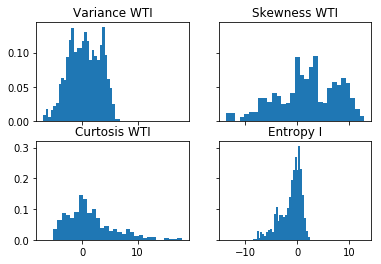

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axarr = plt.subplots(2, 2, sharex='col', sharey='row')

axarr[0, 0].hist(data[attr[0]], 30, normed=1)
axarr[0, 0].set_title(attr[0])
axarr[0, 1].hist(data[attr[1]], 30, normed=1)
axarr[0, 1].set_title(attr[1])
axarr[1, 0].hist(data[attr[2]], 30, normed=1)
axarr[1, 0].set_title(attr[2])
axarr[1, 1].hist(data[attr[3]], 30, normed=1)
axarr[1, 1].set_title(attr[3])

plt.show()

Below are scatter plots of genuine notes in green and counterfeit notes in magenta. Notice the stark contrast in the left plot and the near indistinguishability in the other. This observation tells us that the AI will rely more heavily on the left one for information than the right one.

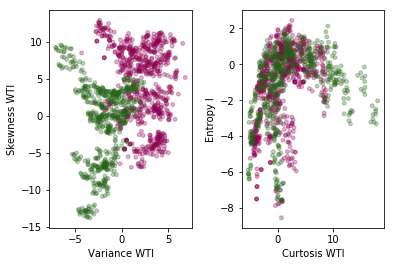

In [3]:
fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(attr[0], attr[1], c=attr[4], s=15, cmap='PiYG', alpha=0.3, data=data)
axarr[0].set(xlabel=attr[0], ylabel=attr[1])
axarr[1].scatter(attr[2], attr[3], c=attr[4], s=15, cmap='PiYG', alpha=0.3, data=data)
axarr[1].set(xlabel=attr[2], ylabel=attr[3])

fig.subplots_adjust(wspace=0.35)
plt.show()

## Split Data

Let's begin by setting aside 80% of the dataset for training and 20% for testing.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(data[attr[:4]], data[attr[4]], test_size=0.2, random_state=1))

## Logistic Regression

One method to categorize banknotes is logistic regression, which divides the data into two sides. To visualize how it works, let's plot the first two attributes. Regions of the plot in green show high chance of being genuine; magenta shows high chance of being counterfeit. Data points in the white region have a 50-50 chance of being genuine.

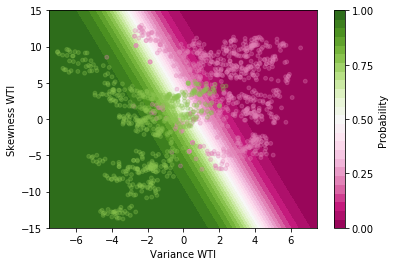

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(data[attr[:2]], data[attr[4]])

xx, yy = np.mgrid[-7.5:7.5:0.01, -15:15:0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)

fig, ax = plt.subplots()
contour = ax.contourf(xx, yy, probs, 25, cmap='PiYG', vmin=0, vmax=1)
axcontour = fig.colorbar(contour)
axcontour.set_label('Probability')
axcontour.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(attr[0], attr[1], c=attr[4], s=15, cmap='PiYG', alpha=0.3, vmin=-0.4, vmax=1.4, data=data)
ax.set(xlabel=attr[0], ylabel=attr[1])
plt.show()

Now it's time to fit the training set into the model and classify the testing set using logistic regression.

In [6]:
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.99272727272727268

The logistic regression model predicted the authenticity of the banknotes with high accuracy. Next let's see if a different machine learning model can outperform it.

## K-Nearest Neighbors

Another way to determine the class of an unknown banknote is to compare it to known banknotes with similar variables. K is the number of comparisons used to predict the unknown banknote. Let's try evaluating the data with K=1.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

It's super effective! KNN with K=1 classified the banknotes with 100% accuracy! Is there even a point to evaluate the data with higher values of K? No. But let's do it anyways.

Let's also plot a line graph that visualizes the accuracy as the value of K increases.

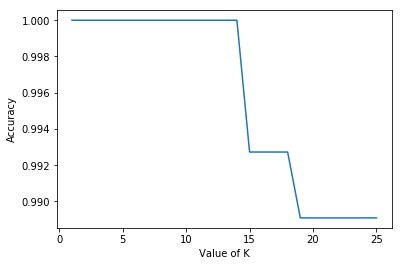

In [8]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

Evidently, the machine learning model performs best at lower values of K. At K=15 accuracy drops by 0.727%. Then it drops by another 0.364% at K=19.

## Conclusion

Even though crooks can outsmart the human eye, they stand no chance against AI equipped with image processing data. The logistic regression model uses probability to evaluate the banknote while the K-nearest neighbors model uses surrounding datapoints. Although the former performed well, KNN with lower values of K perfected the task.